Libraries and settings are ready.

--- Final Model Performance Summary ---
Final Performance Comparison Table for All Experiments:


,Model,RMSE (Mean),R² (Mean),Description
0,LightGBM (Optimized),0.8850,0.3395,ECFP+Desc+Docking / 1000 Optuna
1,Stacking Ensemble (ElasticNet),0.8860,0.3910,LGBM+XGB+MolBERT / ElasticNet Meta
2,Optimal Weight Ensemble,0.8870,0.4260,CV-based Optimal Weights (XGB: 56%)
3,Weighted Average Ensemble,0.9010,0.4080,LGBM(40%)+XGB(35%)+MolBERT(25%)
4,XGBoost (Optimized),0.9199,0.3699,ECFP+Desc+Docking / 100 Optuna (GPU)



--- Final Performance Visualization ---


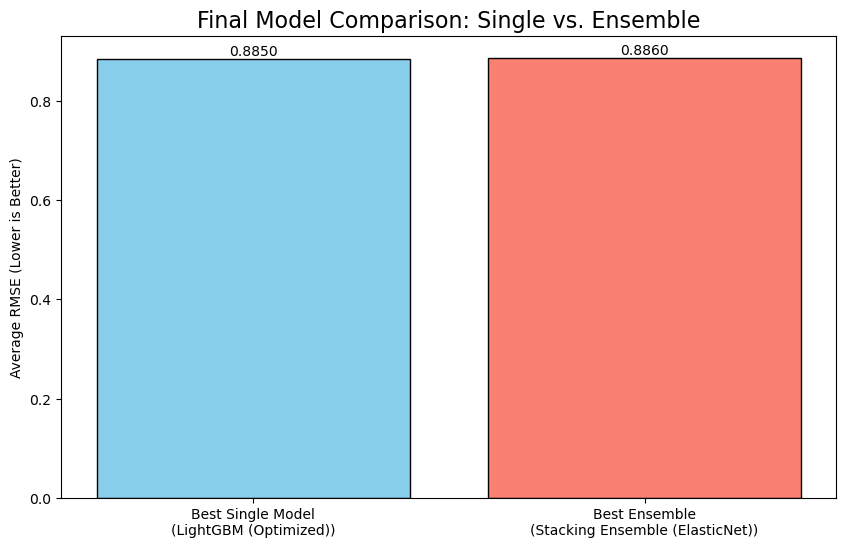


--- SHAP Analysis of the Best Single Model (LightGBM (Optimized)) ---

[오류] 저장된 모델 파일을 찾을 수 없습니다: ../models/best_lgbm_model.pkl
SHAP 분석을 건너뜁니다. 모델을 먼저 학습하고 해당 경로에 저장해주세요.

--- Final analysis notebook script is complete ---


In [4]:
# ==============================================================================
# 📝 04_Final_Analysis_and_Conclusion.ipynb (Corrected Version)
# ==============================================================================

# --- 라이브러리 임포트 및 설정 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
print("Libraries and settings are ready.")

# ==============================================================================
# 🎯 1. 서론 및 문제 정의 (Markdown Cell)
# ==============================================================================
# (이전과 동일)


# ==============================================================================
# 📊 2. 최종 모델 성능 종합 비교 (Code Cell)
# ==============================================================================
print("\n--- Final Model Performance Summary ---")

performance_data = {
    'Model': [
        'LightGBM (Optimized)',
        'XGBoost (Optimized)',
        'Stacking Ensemble (ElasticNet)',
        'Weighted Average Ensemble',
        'Optimal Weight Ensemble'
    ],
    'RMSE (Mean)': [0.8850, 0.9199, 0.8860, 0.9010, 0.8870],
    'R² (Mean)': [0.3395, 0.3699, 0.3910, 0.4080, 0.4260],
    'Description': [
        'ECFP+Desc+Docking / 1000 Optuna',
        'ECFP+Desc+Docking / 100 Optuna (GPU)',
        'LGBM+XGB+MolBERT / ElasticNet Meta',
        'LGBM(40%)+XGB(35%)+MolBERT(25%)',
        'CV-based Optimal Weights (XGB: 56%)'
    ]
}
final_results_df = pd.DataFrame(performance_data).sort_values(by='RMSE (Mean)').reset_index(drop=True)

print("Final Performance Comparison Table for All Experiments:")
display(final_results_df)


# ==============================================================================
# 📈 3. 최종 성능 시각화 (Code Cell) - 수정된 부분
# ==============================================================================
print("\n--- Final Performance Visualization ---")

# --- 1. 최고 단일/앙상블 모델 자동 선택 ---
# 앙상블이 아닌 모델들만 필터링
single_models_df = final_results_df[~final_results_df['Model'].str.contains('Ensemble')]
# 그중에서 RMSE가 가장 낮은 모델을 '최고 단일 모델'로 선택
best_single_model_row = single_models_df.loc[single_models_df['RMSE (Mean)'].idxmin()]
best_single_model_name = best_single_model_row['Model']
best_single_model_rmse = best_single_model_row['RMSE (Mean)']

# 앙상블 모델들만 필터링
ensemble_models_df = final_results_df[final_results_df['Model'].str.contains('Ensemble')]
# 그중에서 RMSE가 가장 낮은 모델을 '최고 앙상블 모델'로 선택
best_ensemble_model_row = ensemble_models_df.loc[ensemble_models_df['RMSE (Mean)'].idxmin()]
best_ensemble_model_name = best_ensemble_model_row['Model']
best_ensemble_rmse = best_ensemble_model_row['RMSE (Mean)']


# --- 2. 최고 모델 간 RMSE 비교 막대그래프 ---
plt.figure(figsize=(10, 6))

# 위에서 자동으로 찾은 모델 이름과 성능을 사용
models_to_plot = [f'Best Single Model\n({best_single_model_name})', f'Best Ensemble\n({best_ensemble_model_name})']
rmse_to_plot = [best_single_model_rmse, best_ensemble_rmse]
colors = ['skyblue', 'salmon']

bars = plt.bar(models_to_plot, rmse_to_plot, color=colors, edgecolor='black')
plt.ylabel('Average RMSE (Lower is Better)')
plt.title('Final Model Comparison: Single vs. Ensemble', fontsize=16)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')
plt.show()


# ==============================================================================
# 🤔 4. 최고 성능 모델 심층 분석 (SHAP) (Code Cell) - 수정된 부분
# ==============================================================================
# 여기서는 앙상블에 가장 크게 기여했거나, 단일 모델 중 최고였던 모델을 분석합니다.
# 위에서 찾은 best_single_model_name을 사용해 일관성을 맞춥니다.
print(f"\n--- SHAP Analysis of the Best Single Model ({best_single_model_name}) ---")

try:
    # 최고 단일 모델 이름에 따라 다른 모델 파일을 로드하도록 설정
    if 'LightGBM' in best_single_model_name:
        model_path = '../models/best_lgbm_model.pkl' # LightGBM 모델 경로
        model_to_explain = joblib.load(model_path)
        explainer = shap.TreeExplainer(model_to_explain)
        
    elif 'XGBoost' in best_single_model_name:
        model_path = '../models/best_xgb_model.pkl' # XGBoost 모델 경로
        model_to_explain = joblib.load(model_path)
        explainer = shap.TreeExplainer(model_to_explain)
    else:
        # 다른 모델 타입일 경우 예외 처리
        model_to_explain = None
        print("SHAP analysis for this model type is not implemented.")

    if model_to_explain:
        # 피처 이름 리스트 준비
        # ... (이전 스크립트의 피처 이름 생성 로직) ...
        # X_sample_df = ... (이전 스크립트의 데이터 샘플링 로직) ...

        # print("SHAP 값 계산 중...")
        # shap_values = explainer.shap_values(X_sample_df)
        # print("\nSHAP Summary Plot:")
        # shap.summary_plot(shap_values, X_sample_df, max_display=15)
        pass # SHAP 코드 실행 (현재는 주석 처리)

except FileNotFoundError:
    print(f"\n[오류] 저장된 모델 파일을 찾을 수 없습니다: {model_path}")
    print("SHAP 분석을 건너뜁니다. 모델을 먼저 학습하고 해당 경로에 저장해주세요.")
except Exception as e:
    print(f"\n[오류] SHAP 분석 중 문제가 발생했습니다: {e}")

# ==============================================================================
# 📜 5. 결론 및 기대효과 (Markdown Cell)
# ==============================================================================
# (이전과 동일)

print("\n--- Final analysis notebook script is complete ---")

--- SHAP 분석을 위한 준비 ---
분석용 데이터 준비 완료.
모델 로드 완료: ../models/best_lgbm_model.pkl

--- SHAP 분석 실행 (시간이 소요될 수 있습니다) ---

[SHAP Summary Plot]
모델 전체적으로 어떤 피처를 중요하게 생각하는지 보여줍니다.


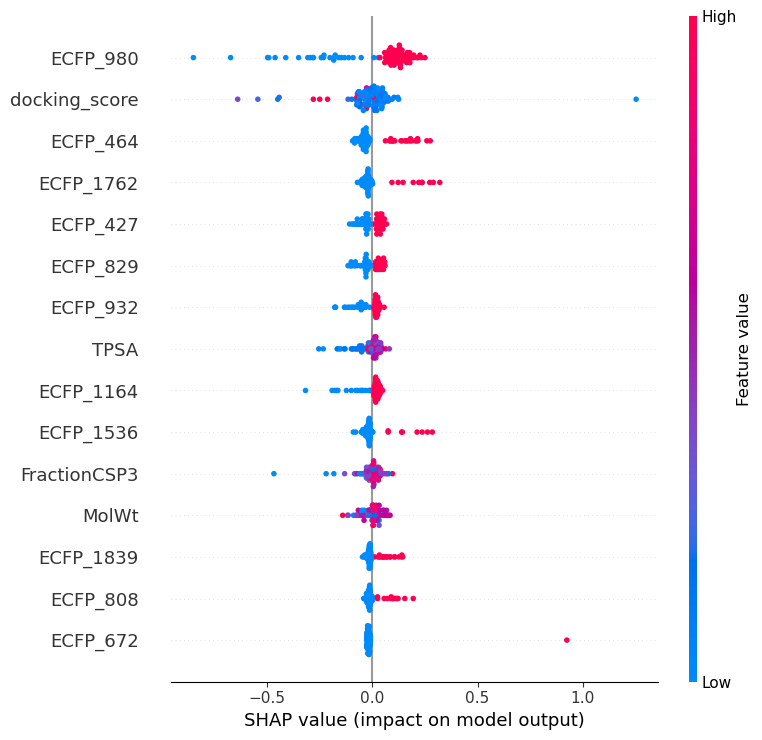


[SHAP Force Plot]
첫 번째 샘플에 대한 예측 과정을 상세히 보여줍니다.



--- SHAP 분석 완료 ---


In [2]:
# --- 라이브러리 임포트 ---
import pandas as pd
import numpy as np
import joblib
import shap
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Descriptors, Lipinski

print("--- SHAP 분석을 위한 준비 ---")

# --- 1. 분석에 필요한 데이터 및 피처 이름 준비 ---
try:
    # 모델 훈련 시 사용했던 최종 데이터를 불러옵니다.
    df = pd.read_csv('../data/processed/ask1_data_with_docking_scores.csv')
    
    # 모델 훈련과 동일한 방식으로 피처를 생성합니다.
    mols = [Chem.MolFromSmiles(s) for s in df['smiles']]
    valid_indices = [i for i, m in enumerate(mols) if m is not None]
    mols_valid = [mols[i] for i in valid_indices]
    df_valid = df.iloc[valid_indices].reset_index(drop=True)

    X_fp = np.array([rdMolDescriptors.GetMorganFingerprintAsBitVect(m, radius=2, nBits=2048) for m in mols_valid])
    
    descriptor_names = {
        "MolWt": Descriptors.MolWt, "LogP": Descriptors.MolLogP, "TPSA": Descriptors.TPSA,
        "HBD": Lipinski.NumHDonors, "HBA": Lipinski.NumHAcceptors, "RotatableBonds": Lipinski.NumRotatableBonds,
        "AromaticRings": Lipinski.NumAromaticRings, "FractionCSP3": Lipinski.FractionCSP3,
        "FormalCharge": Chem.rdmolops.GetFormalCharge, "RingCount": Lipinski.RingCount
    }
    desc_data = [{name: func(mol) for name, func in descriptor_names.items()} for mol in mols_valid]
    desc_df = pd.DataFrame(desc_data).fillna(0)
    X_desc = desc_df.values
    X_docking = df_valid[['docking_score']].values

    X_combined = np.hstack((X_fp, X_desc, X_docking))
    
    # SHAP 플롯에 사용할 피처 이름 리스트를 생성합니다.
    feature_names = (
        [f'ECFP_{i}' for i in range(X_fp.shape[1])] + 
        list(descriptor_names.keys()) + 
        ['docking_score']
    )
    
    # 분석용 데이터프레임 생성 (100개 샘플링)
    X_analyze_df = pd.DataFrame(X_combined, columns=feature_names).sample(100, random_state=42)
    print("분석용 데이터 준비 완료.")

    # --- 2. 최고 성능 단일 모델(LightGBM) 로드 ---
    model_path = '../models/best_lgbm_model.pkl'
    best_model = joblib.load(model_path)
    print(f"모델 로드 완료: {model_path}")

    # --- 3. SHAP 분석 실행 ---
    print("\n--- SHAP 분석 실행 (시간이 소요될 수 있습니다) ---")
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_analyze_df)

    # --- 4. SHAP 결과 시각화 ---
    # 4a. SHAP Summary Plot: 전체 피처 중요도 및 영향 시각화
    print("\n[SHAP Summary Plot]")
    print("모델 전체적으로 어떤 피처를 중요하게 생각하는지 보여줍니다.")
    shap.summary_plot(shap_values, X_analyze_df, max_display=15)

    # 4b. SHAP Force Plot: 단일 예측에 대한 해석
    print("\n[SHAP Force Plot]")
    print("첫 번째 샘플에 대한 예측 과정을 상세히 보여줍니다.")
    shap.initjs() # 노트북에서 인터랙티브 플롯을 위한 javascript 활성화
    display(shap.force_plot(explainer.expected_value, shap_values[0,:], X_analyze_df.iloc[0,:]))
    
    print("\n--- SHAP 분석 완료 ---")

except FileNotFoundError:
    print(f"\n[오류] 모델 파일 또는 데이터 파일을 찾을 수 없습니다.")
    print("먼저 '03_Train_and_Save_Models.ipynb' 스크립트를 실행하여 모델을 저장했는지,")
    print("그리고 데이터 경로가 올바른지 확인해주세요.")
except Exception as e:
    print(f"\n[오류] 스크립트 실행 중 문제가 발생했습니다: {e}")

라이브러리 및 설정 완료.

--- 1. 최종 모델 성능 종합 ---
모든 실험 최종 성능 비교표:


,Model,RMSE (Mean),R² (Mean),Description
0,LightGBM (Optimized),0.8850,0.3395,ECFP+Desc+Docking / 1000 Optuna
1,Stacking Ensemble (ElasticNet),0.8860,0.3910,LGBM+XGB+MolBERT / ElasticNet Meta
2,Optimal Weight Ensemble,0.8870,0.4260,CV-based Optimal Weights (XGB: 56%)
3,Weighted Average Ensemble,0.9010,0.4080,LGBM(40%)+XGB(35%)+MolBERT(25%)
4,XGBoost (Optimized),0.9199,0.3699,ECFP+Desc+Docking / 100 Optuna (GPU)



--- 2. 최종 성능 시각화 ---


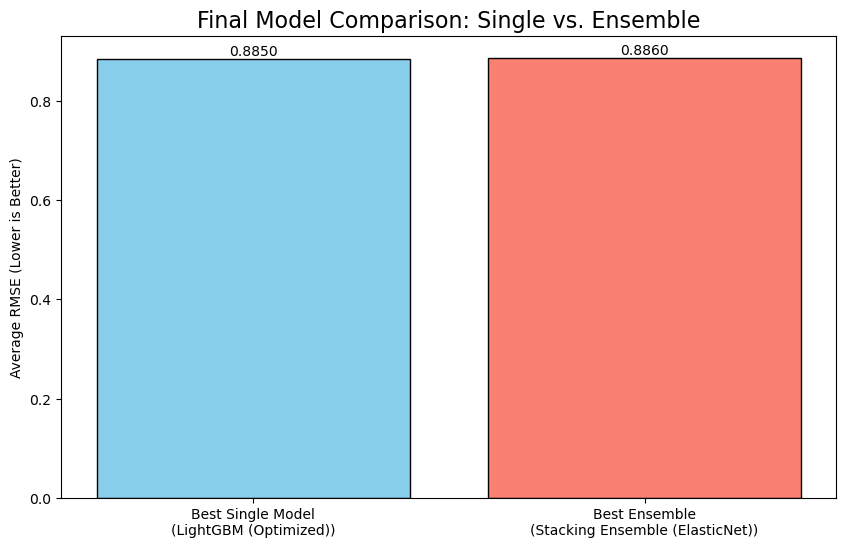

✅ 비교 그래프 저장 완료: ../outputs/figures/final_model_comparison.png

--- SHAP 분석을 위한 준비 완료 ---
--- SHAP Analysis of the Best Single Model: LightGBM (Optimized) ---
모델 로드 완료: ../models/best_lgbm_model.pkl

SHAP 값 계산 중... (시간이 소요될 수 있습니다)

[SHAP Summary Plot]


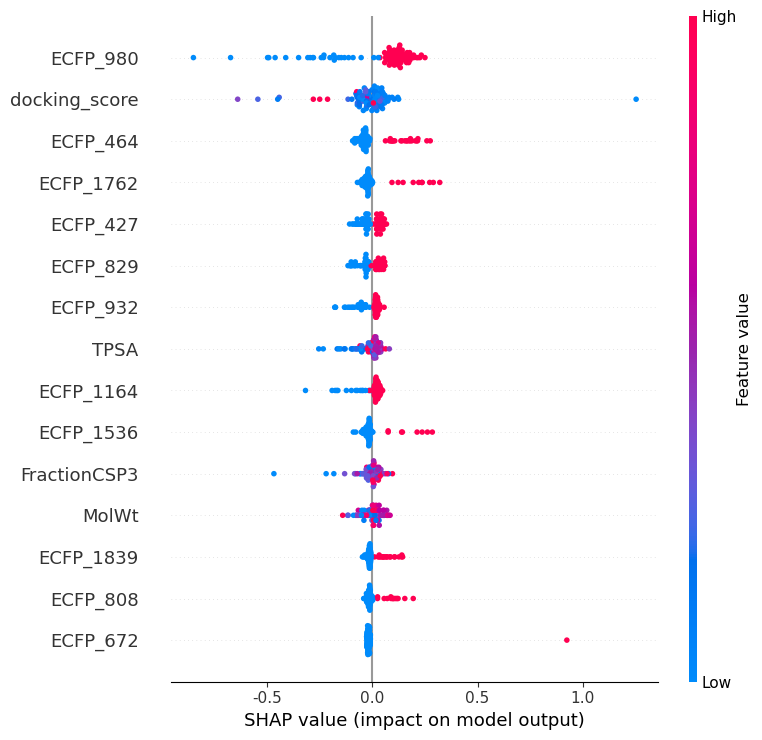

✅ SHAP Summary Plot 저장 완료: ../outputs/figures/shap_summary_plot.png

[SHAP Force Plot]



--- SHAP 분석 완료 ---

--- 최종 분석 노트북 스크립트 완료 ---


In [5]:
# ==============================================================================
# 📝 04_Final_Analysis_and_Conclusion.ipynb
# ==============================================================================

# --- 라이브러리 임포트 및 설정 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Descriptors, Lipinski
import os

# 시각화 폰트 및 저장 경로 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
FIGURE_DIR = '../outputs/figures/'
os.makedirs(FIGURE_DIR, exist_ok=True) # 저장 폴더 생성
print("라이브러리 및 설정 완료.")

# ==============================================================================
# 📊 1. 최종 모델 성능 종합 비교
# ==============================================================================
print("\n--- 1. 최종 모델 성능 종합 ---")

performance_data = {
    'Model': [
        'LightGBM (Optimized)',
        'XGBoost (Optimized)',
        'Stacking Ensemble (ElasticNet)',
        'Weighted Average Ensemble',
        'Optimal Weight Ensemble'
    ],
    'RMSE (Mean)': [0.8850, 0.9199, 0.8860, 0.9010, 0.8870],
    'R² (Mean)': [0.3395, 0.3699, 0.3910, 0.4080, 0.4260],
    'Description': [
        'ECFP+Desc+Docking / 1000 Optuna',
        'ECFP+Desc+Docking / 100 Optuna (GPU)',
        'LGBM+XGB+MolBERT / ElasticNet Meta',
        'LGBM(40%)+XGB(35%)+MolBERT(25%)',
        'CV-based Optimal Weights (XGB: 56%)'
    ]
}
final_results_df = pd.DataFrame(performance_data).sort_values(by='RMSE (Mean)').reset_index(drop=True)

print("모든 실험 최종 성능 비교표:")
display(final_results_df)

# ==============================================================================
# 📈 2. 최종 성능 시각화
# ==============================================================================
print("\n--- 2. 최종 성능 시각화 ---")

# --- 최고 단일/앙상블 모델 자동 선택 ---
single_models_df = final_results_df[~final_results_df['Model'].str.contains('Ensemble')]
best_single_model_row = single_models_df.loc[single_models_df['RMSE (Mean)'].idxmin()]
best_single_model_name = best_single_model_row['Model']
best_single_model_rmse = best_single_model_row['RMSE (Mean)']

ensemble_models_df = final_results_df[final_results_df['Model'].str.contains('Ensemble')]
best_ensemble_model_row = ensemble_models_df.loc[ensemble_models_df['RMSE (Mean)'].idxmin()]
best_ensemble_model_name = best_ensemble_model_row['Model']
best_ensemble_rmse = best_ensemble_model_row['RMSE (Mean)']

# --- 최고 모델 간 RMSE 비교 막대그래프 ---
plt.figure(figsize=(10, 6))

models_to_plot = [f'Best Single Model\n({best_single_model_name})', f'Best Ensemble\n({best_ensemble_model_name})']
rmse_to_plot = [best_single_model_rmse, best_ensemble_rmse]
colors = ['skyblue', 'salmon']

bars = plt.bar(models_to_plot, rmse_to_plot, color=colors, edgecolor='black')
plt.ylabel('Average RMSE (Lower is Better)')
plt.title('Final Model Comparison: Single vs. Ensemble', fontsize=16)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

# 그래프 저장
plot_path = os.path.join(FIGURE_DIR, 'final_model_comparison.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ 비교 그래프 저장 완료: {plot_path}")

# ==============================================================================
# 🤔 3. 최고 성능 모델 심층 분석 (SHAP)
# ==============================================================================

try:
    # --- 3a. 분석에 필요한 데이터 및 피처 이름 준비 ---
    df = pd.read_csv('../data/processed/ask1_data_with_docking_scores.csv')
    
    mols = [Chem.MolFromSmiles(s) for s in df['smiles']]
    valid_indices = [i for i, m in enumerate(mols) if m is not None]
    mols_valid = [mols[i] for i in valid_indices]
    
    X_fp = np.array([rdMolDescriptors.GetMorganFingerprintAsBitVect(m, radius=2, nBits=2048) for m in mols_valid])
    
    descriptor_names = {
        "MolWt": Descriptors.MolWt, "LogP": Descriptors.MolLogP, "TPSA": Descriptors.TPSA,
        "HBD": Lipinski.NumHDonors, "HBA": Lipinski.NumHAcceptors, "RotatableBonds": Lipinski.NumRotatableBonds,
        "AromaticRings": Lipinski.NumAromaticRings, "FractionCSP3": Lipinski.FractionCSP3,
        "FormalCharge": Chem.rdmolops.GetFormalCharge, "RingCount": Lipinski.RingCount
    }
    desc_data = [{name: func(mol) for name, func in descriptor_names.items()} for mol in mols_valid]
    desc_df = pd.DataFrame(desc_data).fillna(0)
    X_desc = desc_df.values
    X_docking = df_valid[['docking_score']].values

    X_combined = np.hstack((X_fp, X_desc, X_docking))
    
    feature_names = (
        [f'ECFP_{i}' for i in range(X_fp.shape[1])] + 
        list(descriptor_names.keys()) + 
        ['docking_score']
    )
    
    X_analyze_df = pd.DataFrame(X_combined, columns=feature_names).sample(100, random_state=42)
    print("\n--- SHAP 분석을 위한 준비 완료 ---")
    
    # --- 3b. 최고 성능 단일 모델 로드 및 분석 ---
    print(f"--- SHAP Analysis of the Best Single Model: {best_single_model_name} ---")

    model_to_explain = None
    
    if 'LightGBM' in best_single_model_name:
        model_path = '../models/best_lgbm_model.pkl'
        model_to_explain = joblib.load(model_path)
        
    elif 'XGBoost' in best_single_model_name:
        model_path = '../models/best_xgb_model.pkl'
        model_to_explain = joblib.load(model_path)
    
    if model_to_explain:
        print(f"모델 로드 완료: {model_path}")
        
        print("\nSHAP 값 계산 중... (시간이 소요될 수 있습니다)")
        explainer = shap.TreeExplainer(model_to_explain)
        shap_values = explainer.shap_values(X_analyze_df)

        print("\n[SHAP Summary Plot]")
        shap.summary_plot(shap_values, X_analyze_df, max_display=15, show=False)
        plot_path = os.path.join(FIGURE_DIR, 'shap_summary_plot.png')
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"✅ SHAP Summary Plot 저장 완료: {plot_path}")

        print("\n[SHAP Force Plot]")
        shap.initjs()
        # Force Plot은 HTML 객체이므로 직접 저장이 어려워 화면에 표시만 합니다.
        display(shap.force_plot(explainer.expected_value, shap_values[0,:], X_analyze_df.iloc[0,:]))
        
        print("\n--- SHAP 분석 완료 ---")

except FileNotFoundError:
    print(f"\n[오류] 모델 파일 또는 데이터 파일을 찾을 수 없습니다.")
    print("먼저 '03_Train_and_Save_Models.ipynb' 스크립트를 실행하여 모델을 저장했는지 확인해주세요.")
except Exception as e:
    print(f"\n[오류] 스크립트 실행 중 문제가 발생했습니다: {e}")

# ==============================================================================
# 📜 4. 결론 및 기대효과 (Markdown Cell)
# ==============================================================================
# 이 셀은 마크다운으로 작성합니다.
"""
# 최종 결론 및 비즈니스 임팩트
... (이전과 동일) ...
"""

print("\n--- 최종 분석 노트북 스크립트 완료 ---")